#Output variable -> y y -> Whether the client has subscribed a term deposit or not  Binomial ("yes" or "no")


In [93]:
from google.colab import files
uploaded = files.upload()


Saving bank-full (1).csv to bank-full (1) (2).csv


In [12]:
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('bank-full (1).csv',sep =';')
# Display the first few rows of the dataset
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [96]:
# Display the first few rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [97]:
# Summary statistics of the numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [98]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [101]:
df.shape

(45211, 17)

# to remove duplicated values

In [102]:
#finding duplicates
df.duplicated().sum()

0

# To deal with missing values

In [103]:
#finding missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# encodeng -coverting object data in to numeric column

In [7]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [8]:
df[cat_cols]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [10]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,2.0,5,8.0,261.0,1.0,-1.0,0.0,3.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,2.0,5,8.0,151.0,1.0,-1.0,0.0,3.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,5,8.0,76.0,1.0,-1.0,0.0,3.0,0.0
3,47.0,1.0,1.0,3.0,0.0,1506.0,1.0,0.0,2.0,5,8.0,92.0,1.0,-1.0,0.0,3.0,0.0
4,33.0,11.0,2.0,3.0,0.0,1.0,0.0,0.0,2.0,5,8.0,198.0,1.0,-1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9.0,1.0,2.0,0.0,825.0,0.0,0.0,0.0,17,9.0,643.0,3.0,-1.0,0.0,3.0,1.0
45207,70.5,5.0,0.0,0.0,0.0,1729.0,0.0,0.0,0.0,17,9.0,456.0,2.0,-1.0,0.0,3.0,1.0
45208,70.5,5.0,1.0,1.0,0.0,3462.0,0.0,0.0,0.0,17,9.0,643.0,5.0,-1.0,0.0,2.0,1.0
45209,57.0,1.0,1.0,1.0,0.0,668.0,0.0,0.0,1.0,17,9.0,508.0,4.0,-1.0,0.0,3.0,0.0


In [108]:
df.dtypes

age            int64
job          float64
marital      float64
education    float64
default      float64
balance        int64
housing      float64
loan         float64
contact      float64
day            int64
month        float64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome     float64
y            float64
dtype: object

#Analysing data

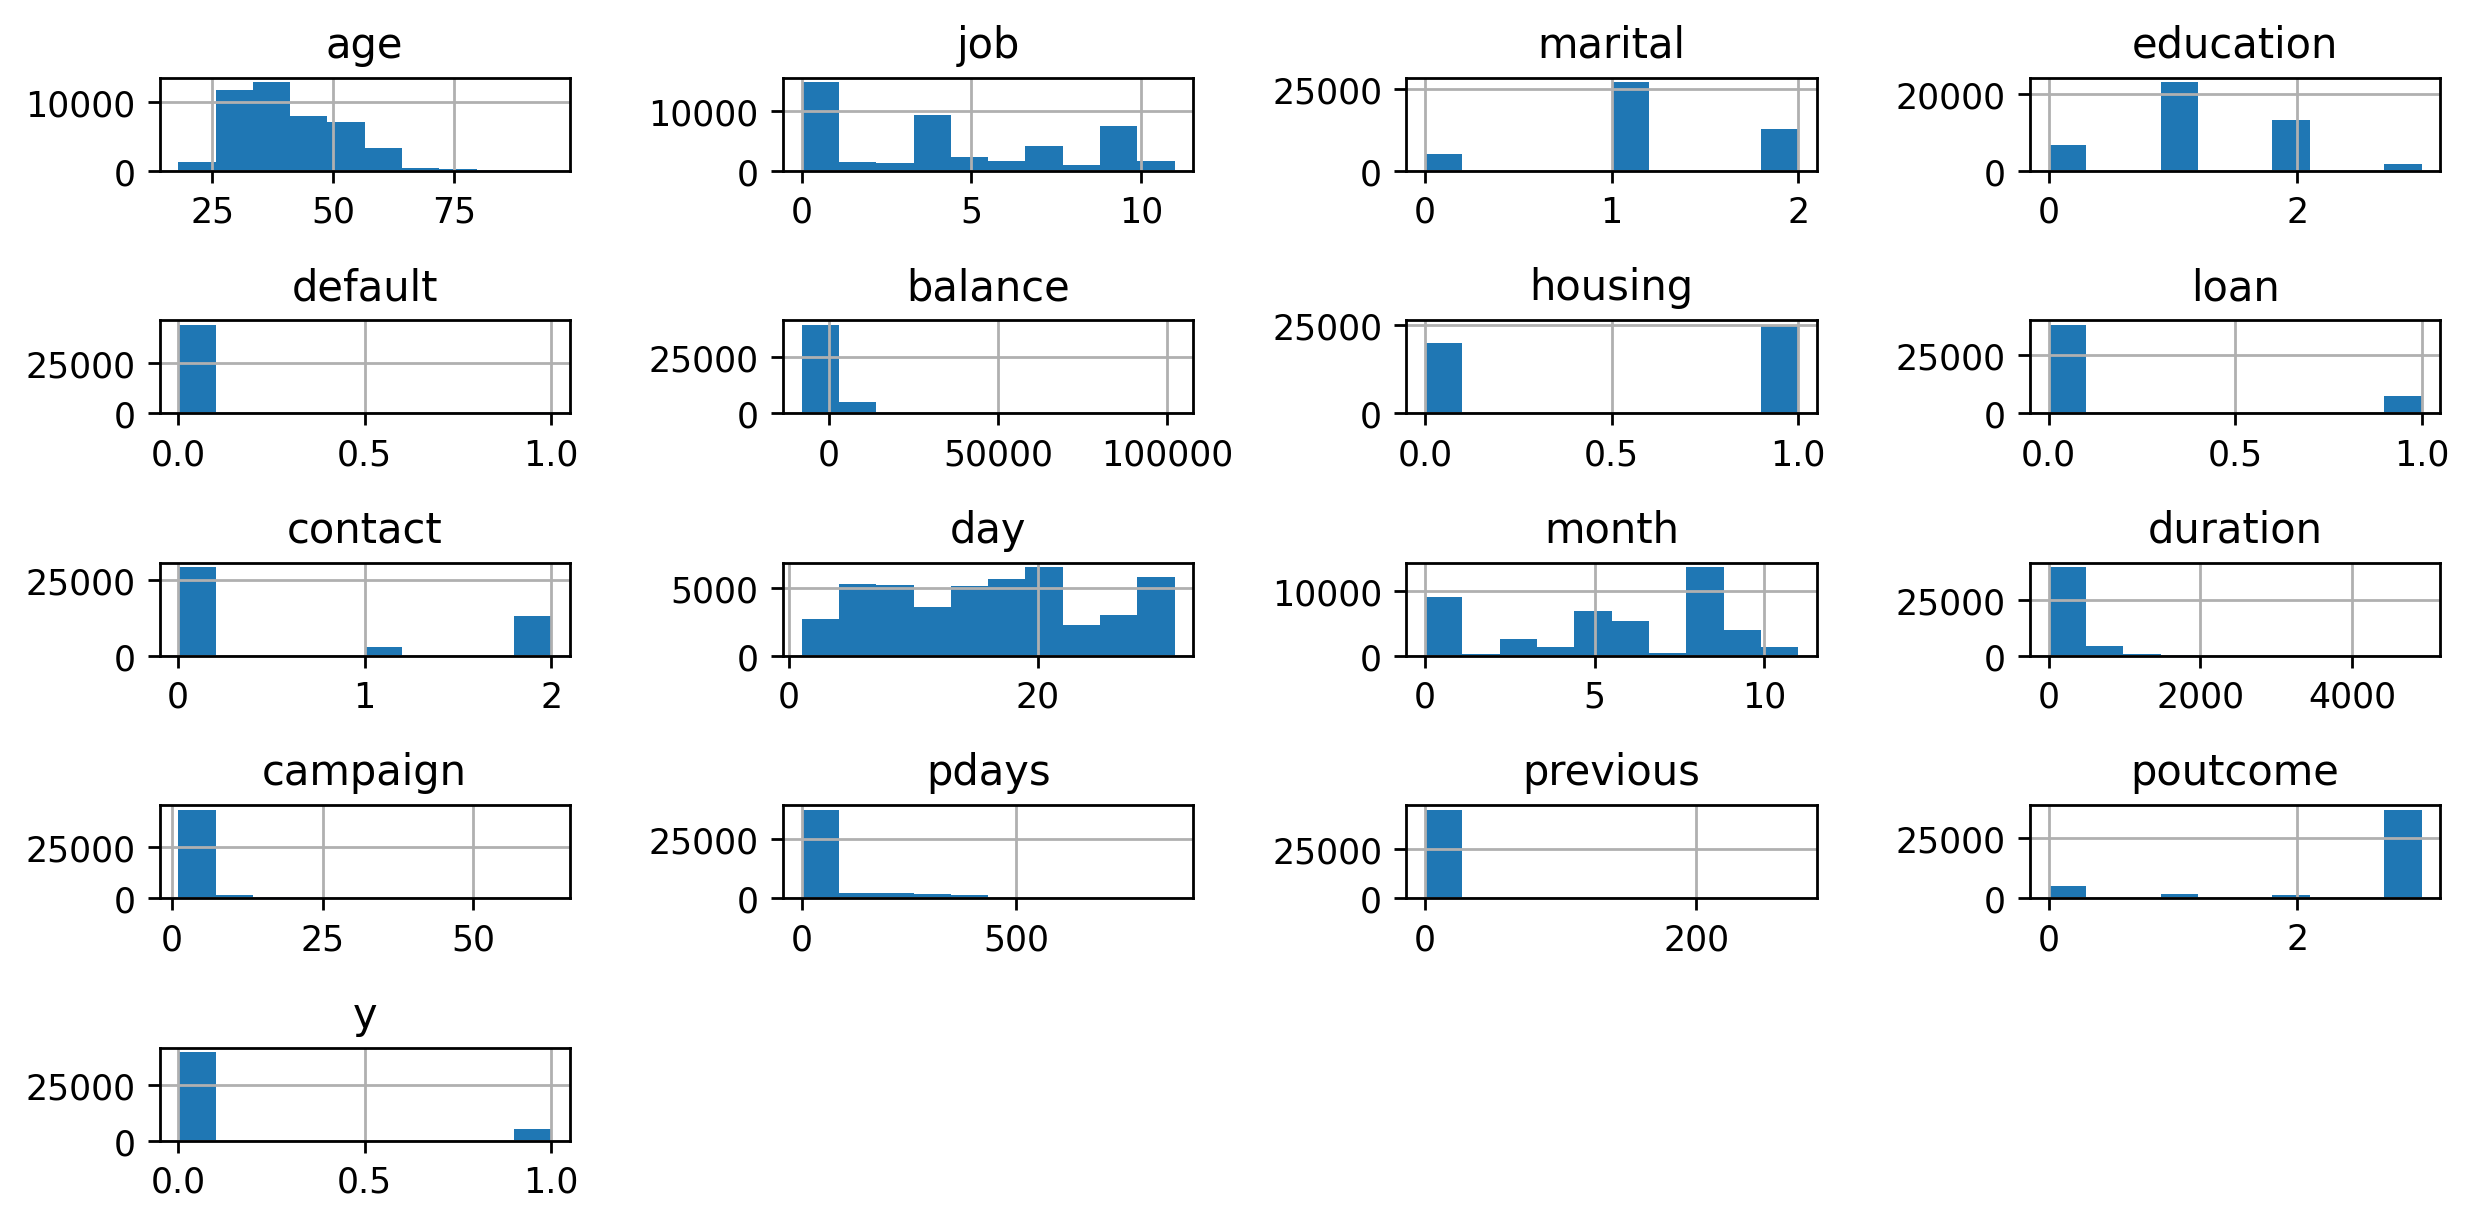

In [109]:
df.hist()
plt.tight_layout()

<Axes: >

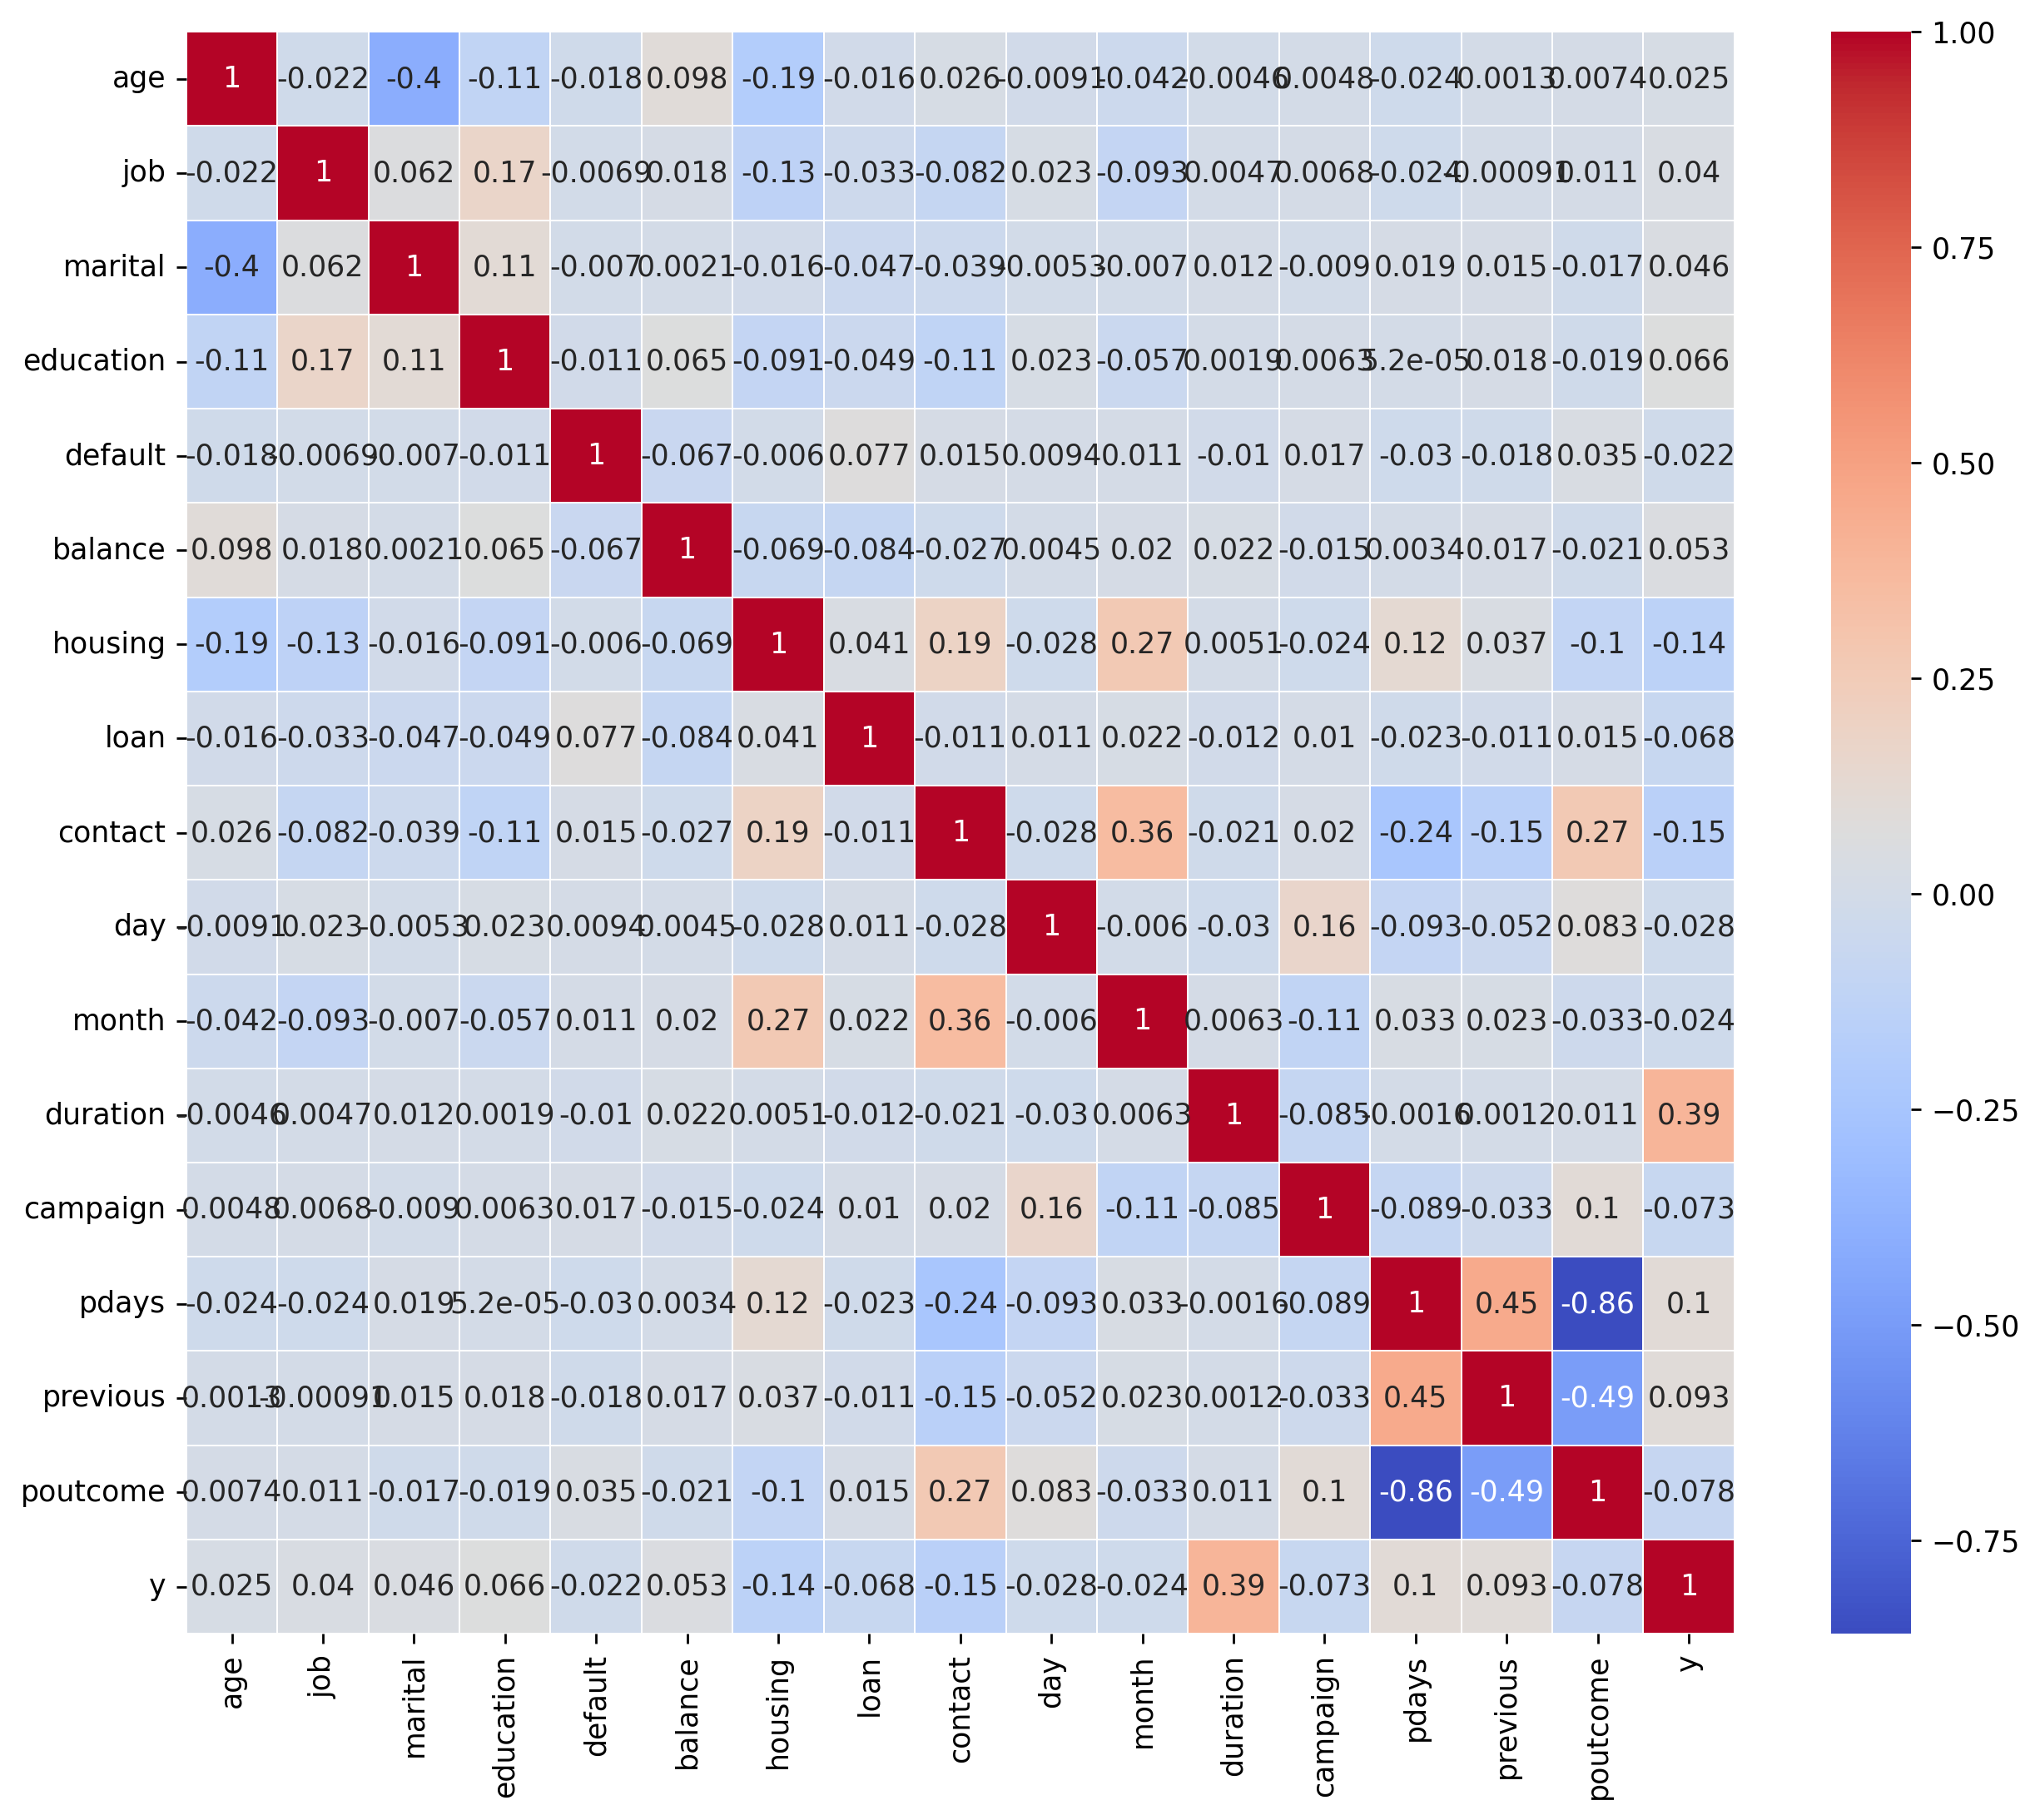

In [110]:
# Assuming 'df' is your DataFrame
s = df.select_dtypes(include="number").corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Customize the color map for better visibility, for example, using 'coolwarm'
sns.heatmap(s, annot=True, cmap='coolwarm', linewidths=.5)

In [111]:
#scatterplot to understand relatinship

In [ ]:
sns.pairplot(df)

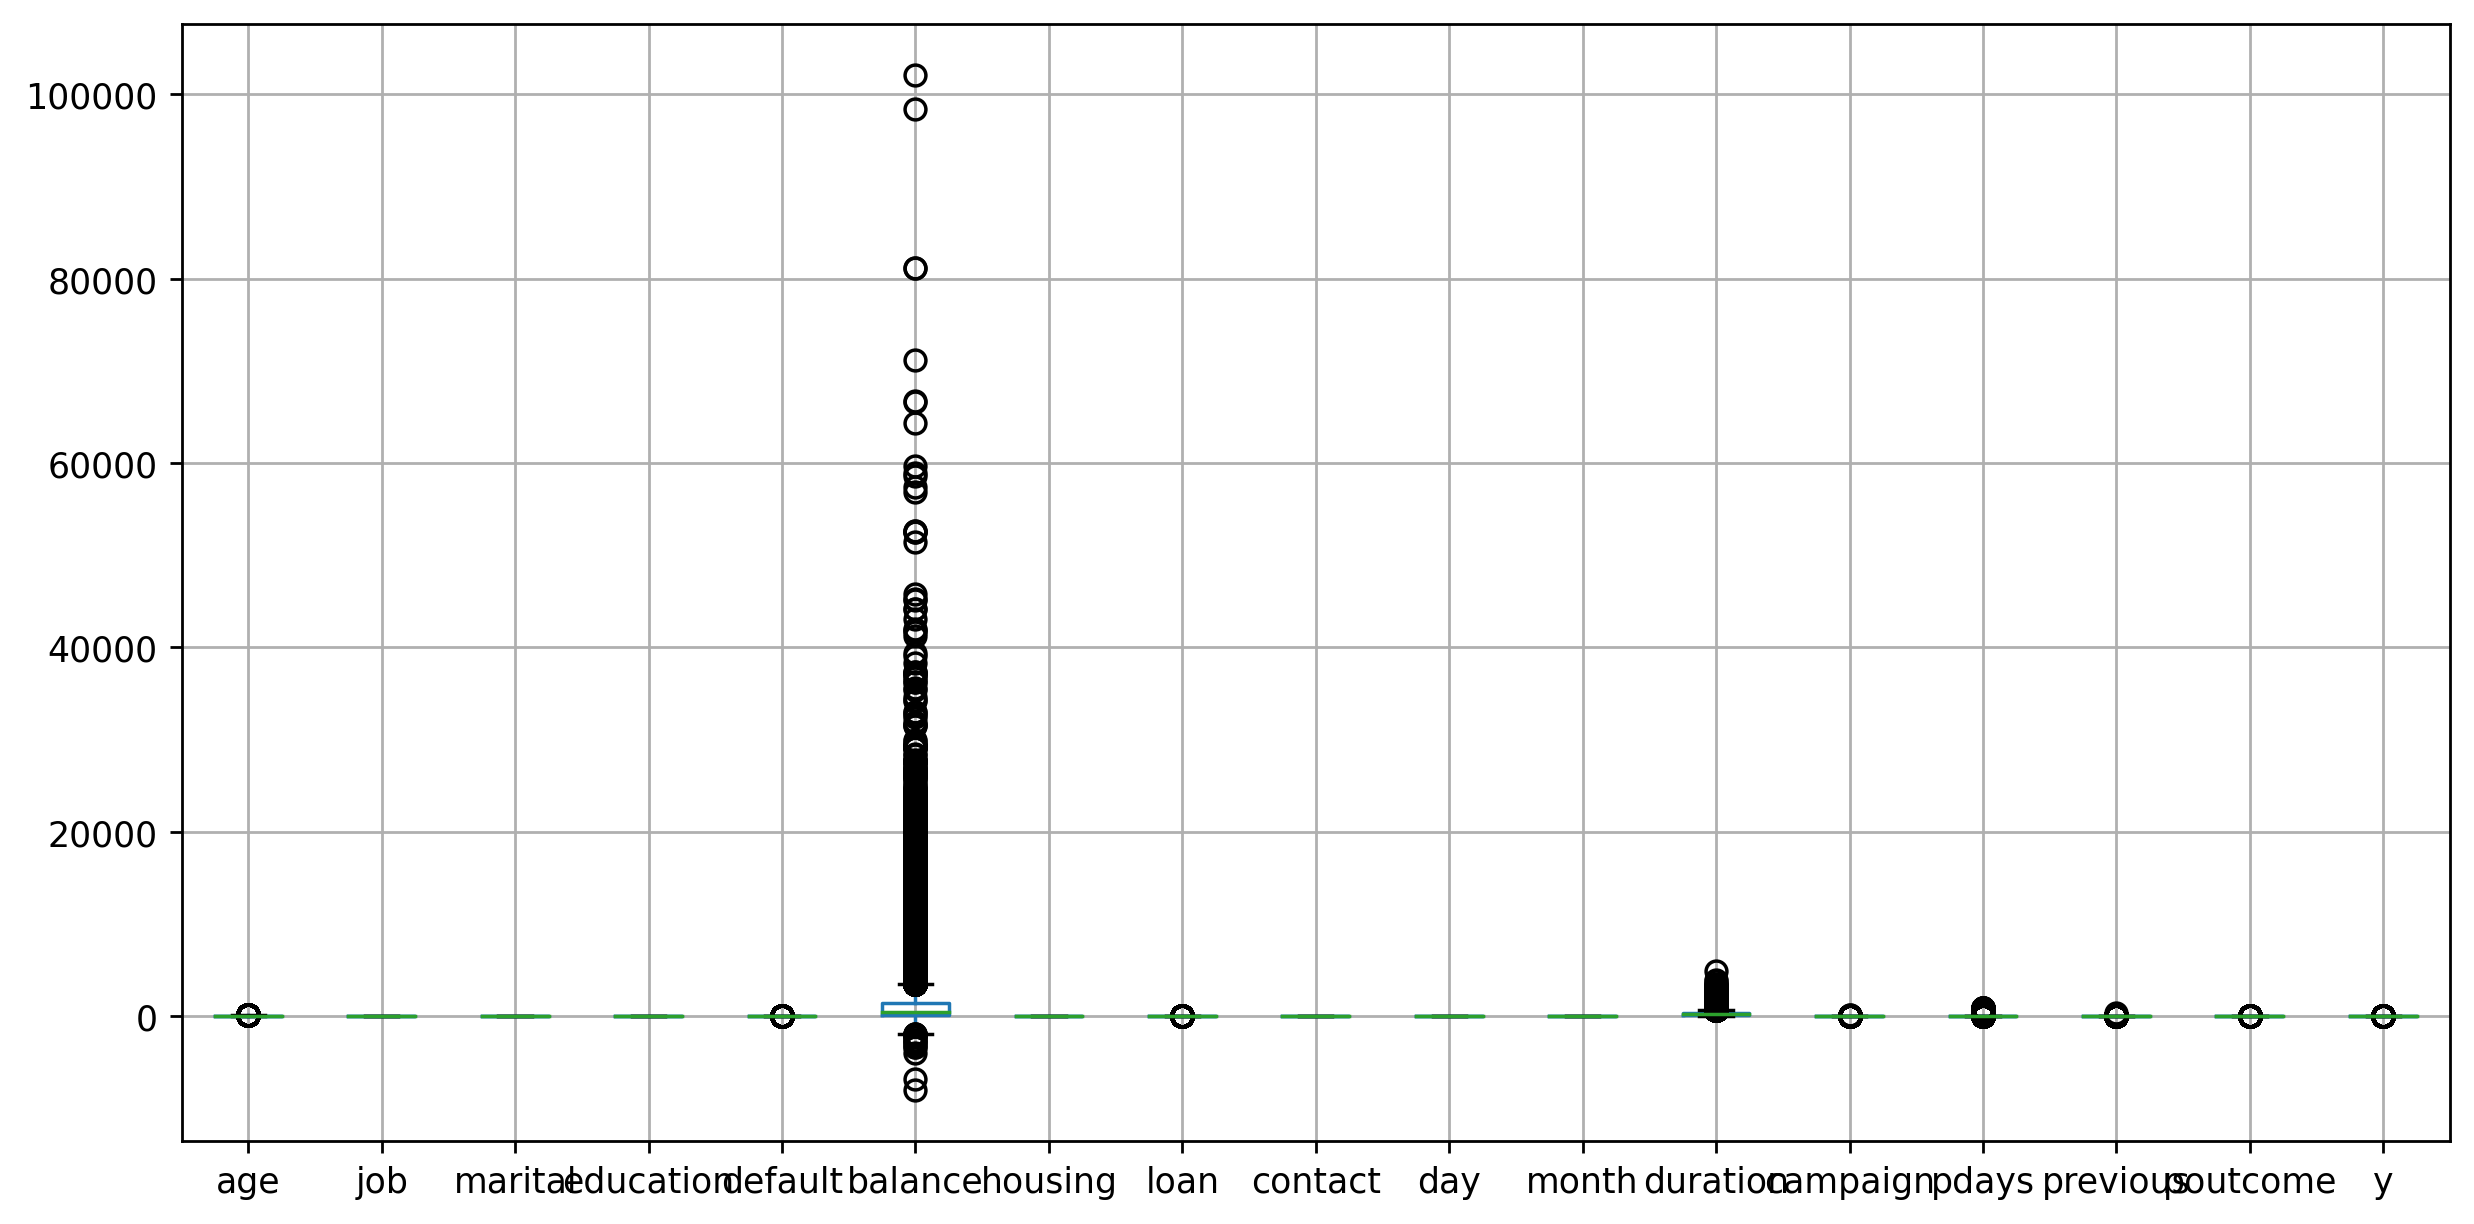

In [113]:
df.boxplot()
plt.tight_layout()

# for delete outliers

In [5]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['age','balance','duration','campaign','pdays','previous',]:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

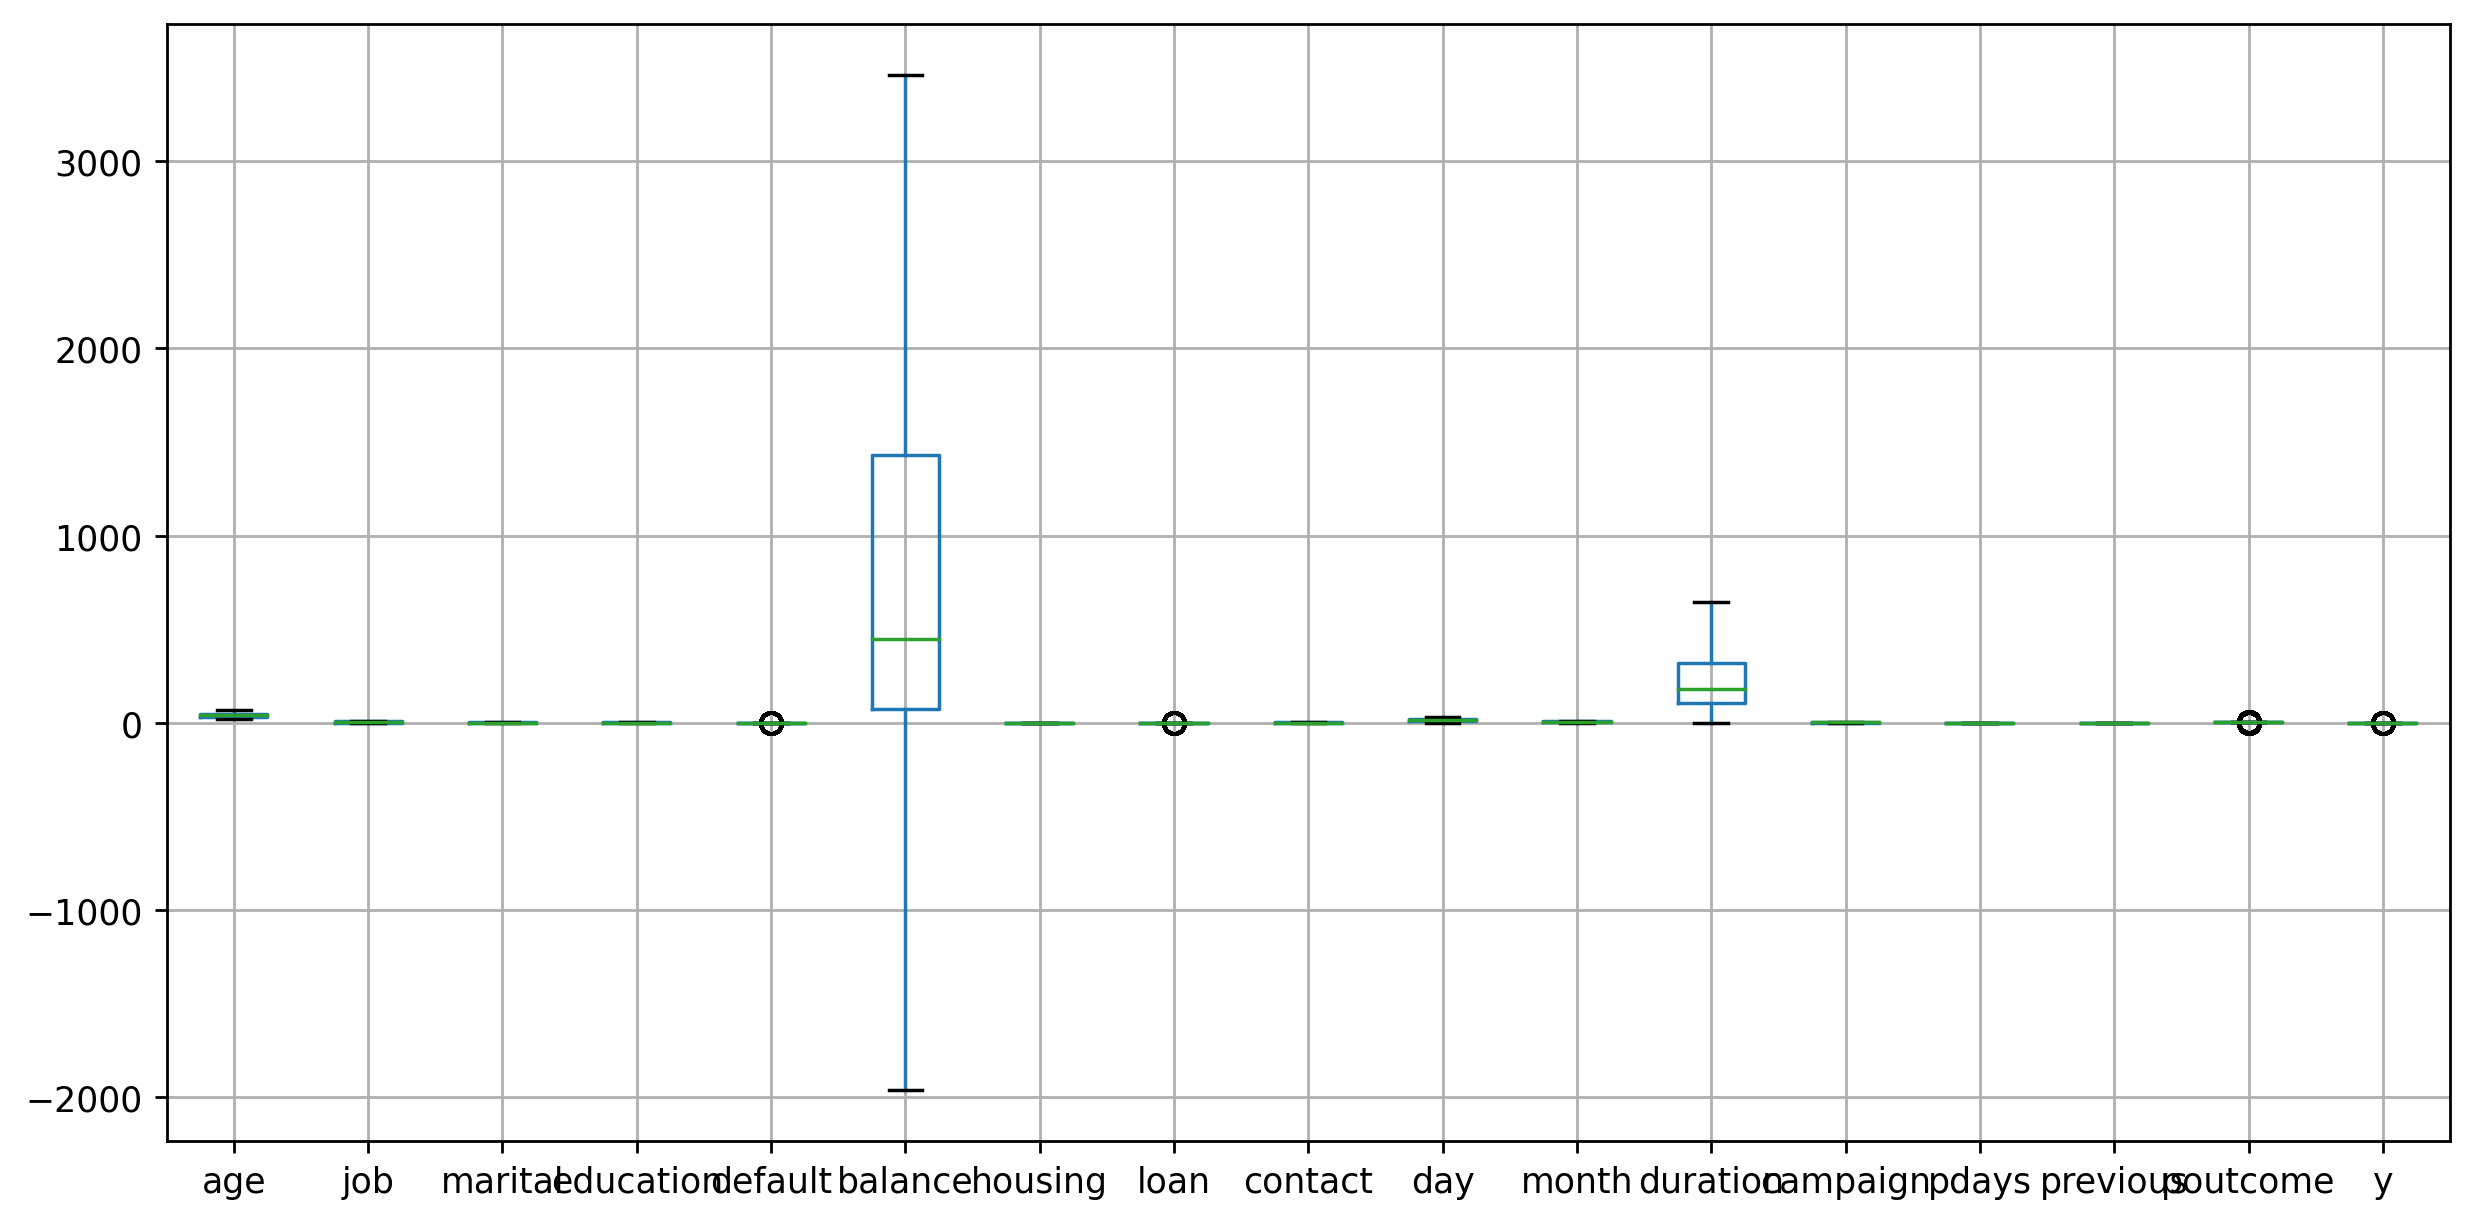

In [13]:
df.boxplot()
plt.tight_layout()

#feature selection

# PPS score

In [14]:
pip install ppscore

In [15]:
import ppscore as ps

In [16]:
feature_sel = ps.matrix(df)

In [17]:
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,job,0.0,regression,True,mean absolute error,2.6894,2.737774,DecisionTreeRegressor()
2,age,marital,0.0,regression,True,mean absolute error,0.4056,0.413604,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,0.5404,0.612105,DecisionTreeRegressor()
4,age,default,0.0,regression,True,mean absolute error,0.0178,0.034916,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
284,y,campaign,0.0,regression,True,mean absolute error,1.2024,1.329750,DecisionTreeRegressor()
285,y,pdays,0.0,target_is_constant,True,None,1.0000,1.000000,None
286,y,previous,0.0,target_is_constant,True,None,1.0000,1.000000,None
287,y,poutcome,0.0,regression,True,mean absolute error,0.4364,0.709295,DecisionTreeRegressor()


In [18]:
feature_sel[feature_sel['y'] == 'y']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
16,age,y,0.0,regression,True,mean absolute error,0.118,0.201253,DecisionTreeRegressor()
33,job,y,0.0,regression,True,mean absolute error,0.118,0.203542,DecisionTreeRegressor()
50,marital,y,0.0,regression,True,mean absolute error,0.118,0.206732,DecisionTreeRegressor()
67,education,y,0.0,regression,True,mean absolute error,0.118,0.207924,DecisionTreeRegressor()
84,default,y,0.0,regression,True,mean absolute error,0.118,0.208283,DecisionTreeRegressor()
101,balance,y,0.0,regression,True,mean absolute error,0.118,0.204848,DecisionTreeRegressor()
118,housing,y,0.0,regression,True,mean absolute error,0.118,0.204047,DecisionTreeRegressor()
135,loan,y,0.0,regression,True,mean absolute error,0.118,0.207344,DecisionTreeRegressor()
152,contact,y,0.0,regression,True,mean absolute error,0.118,0.203821,DecisionTreeRegressor()
169,day,y,0.0,regression,True,mean absolute error,0.118,0.203919,DecisionTreeRegressor()


# Tree Based method

In [31]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

X = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y = df['y']
# Assuming x and y are your feature matrix and target variable
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

# Selected features
selected_features = X.columns[fit.support_]
print(selected_features)


Index(['age', 'balance', 'day', 'month', 'duration'], dtype='object')


#model building

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [30]:
X = df[['age', 'balance', 'day', 'marital', 'pdays', 'duration', 'previous']]
y = df['y']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['marital']
numerical_features = X.columns.difference(categorical_features)

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['marital'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [23]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Print actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)

       Actual  Predicted
3776      0.0        0.0
9928      0.0        0.0
33409     0.0        0.0
31885     0.0        0.0
15738     0.0        0.0
...       ...        ...
13353     0.0        0.0
38732     1.0        1.0
5654      0.0        0.0
3779      0.0        0.0
11677     0.0        0.0

[9043 rows x 2 columns]


#evaluation

In [24]:
from sklearn.metrics import confusion_matrix
# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', report)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.8843

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7952
         1.0       0.56      0.18      0.28      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.88      0.86      9043

Confusion Matrix:
 [[7798  154]
 [ 892  199]]


In [25]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions on the training set
y_train_pred = model.predict(X_train)
# Predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate training and testing accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f'Training Accuracy: {accuracy_train:.4f}')
print(f'Testing Accuracy: {accuracy_test:.4f}')

Training Accuracy: 0.8851
Testing Accuracy: 0.8843


In [27]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.82


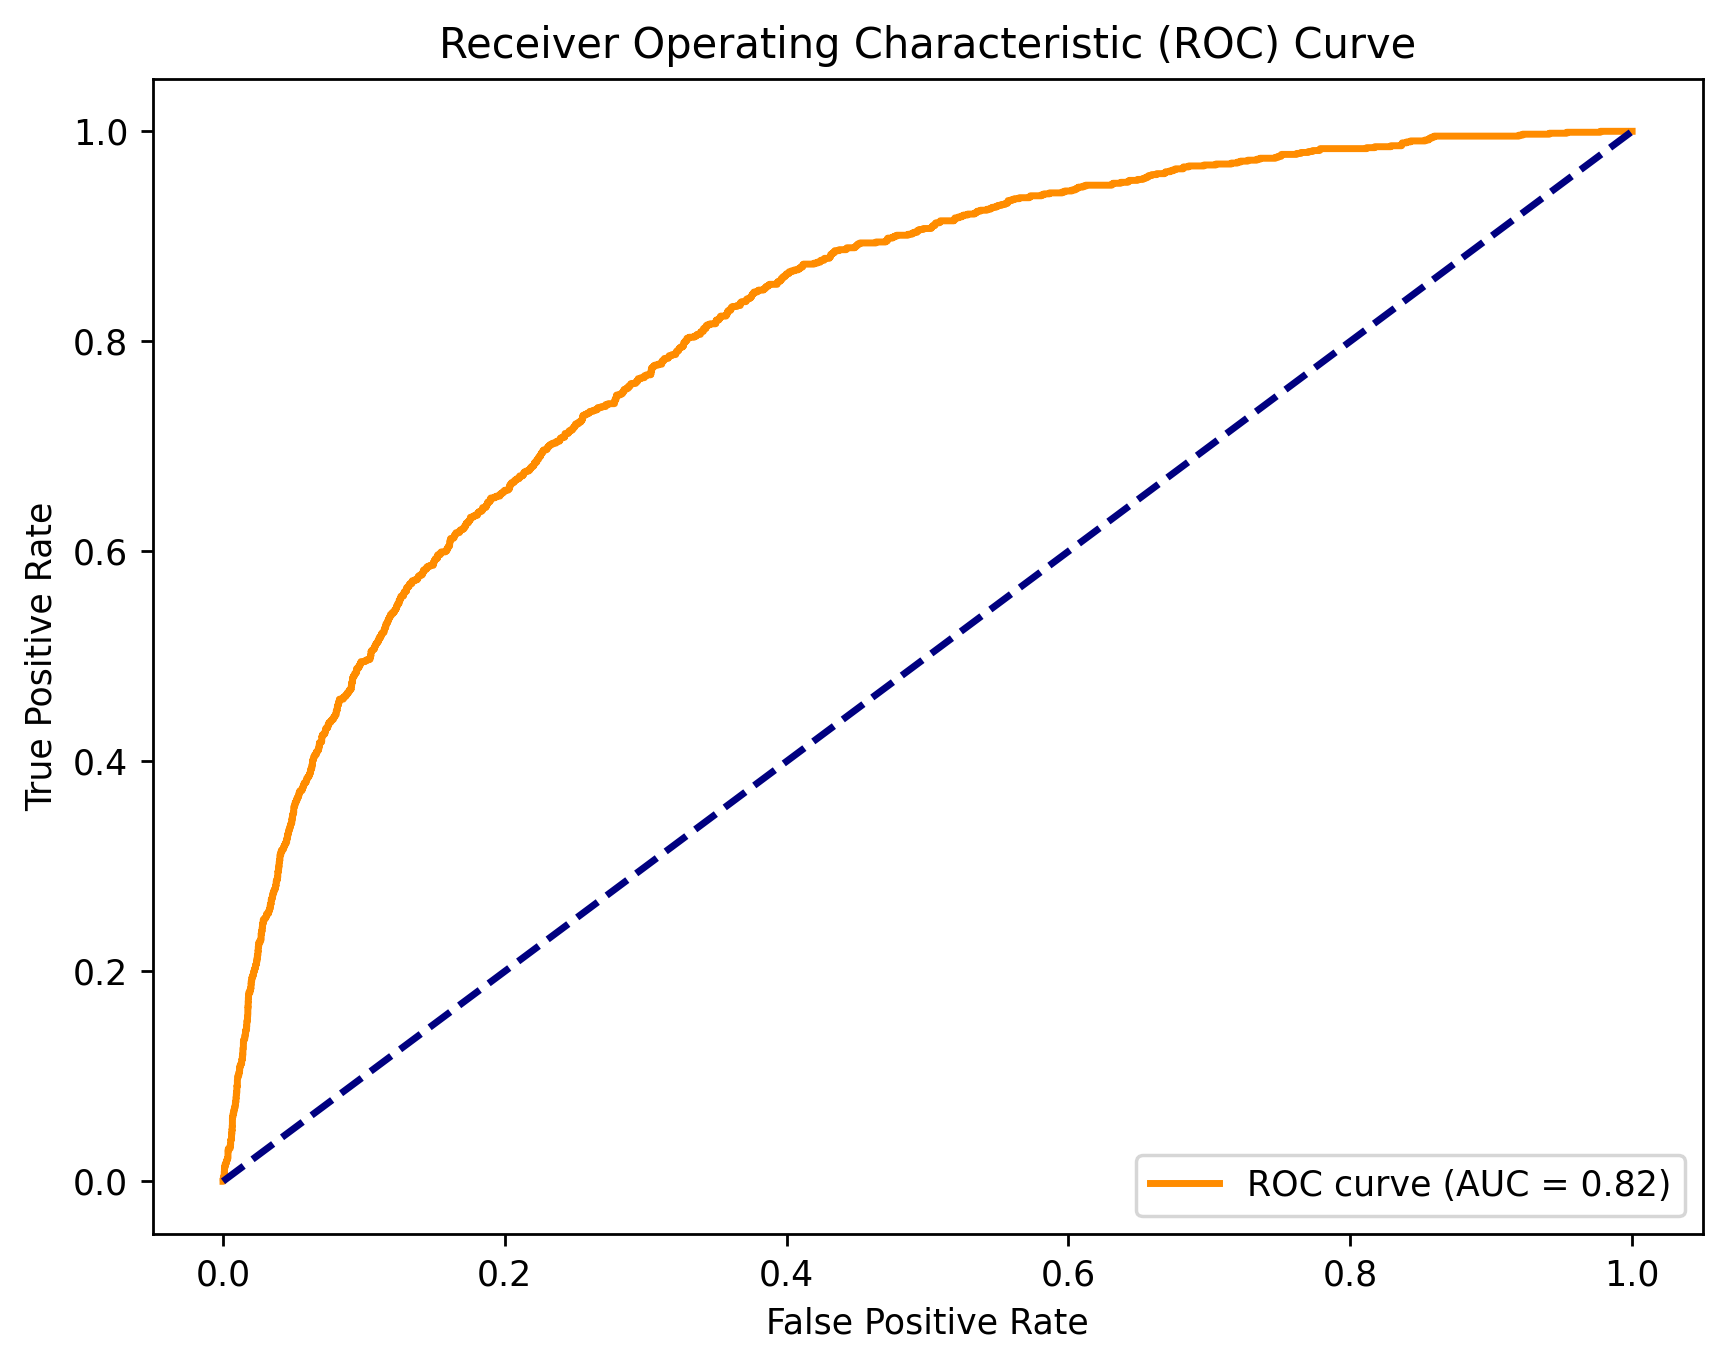

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()